In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from rhessys import utilities as rh
import ntpath
from hydro import objective_fxns as ob
from IPython.display import clear_output

In [2]:
prfx = '/RHESSys/ComoCreek_new/scripts/snow_cal2_'
raintemp = np.loadtxt(prfx+'raintemp.txt')
snowtemp = np.loadtxt(prfx+'snowtemp.txt')
smtc = np.loadtxt(prfx+'smtc.txt')
msed = np.loadtxt(prfx+'msed.txt')

In [13]:
tmp = pd.DataFrame({'raintemp':raintemp,'snowtemp':snowtemp,
                    'smtc':smtc,'msed':msed})

In [14]:
tmp.describe()

,msed,raintemp,smtc,snowtemp
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,-50.077861,-2.504099,0.049701,2.501475
std,17.295718,1.442683,0.028930,1.442079
min,-79.997000,-5.000000,0.000100,0.000000
25%,-64.971750,-3.756000,0.024400,1.250000
50%,-50.166500,-2.524000,0.049400,2.510000
75%,-35.220750,-1.244000,0.074900,3.746250
max,-20.005000,-0.001000,0.099900,4.999000


In [3]:
strt = 2004
nd = 2012

In [4]:
SWE = pd.read_pickle('/RHESSys/ComoCreek_new/clim/niwot_snotel.pcl')
SWE.swe *= 25.4
SWE['wateryear'] = SWE.index.map(rh.wateryear)
SWE = SWE.loc[(SWE.wateryear>=strt) & (SWE.wateryear<=nd),:]

In [5]:
files = glob.glob('/RHESSys/ComoCreek_new/out/snow2/snow_cal2_*_basin.daily')

In [6]:
cals = pd.DataFrame({'files':files})

In [7]:
def calc_obfx(fl):
    dat = rh.readRHESSysBasin(fl)
    dat = dat.loc[(dat.wateryear>=strt) & (dat.wateryear<=nd),:]
    
    return ob.nashsut(SWE.swe,dat.snowpack) # compute the objective function

In [8]:
def get_id(fl):
    pth,base=ntpath.split(fl) # split out the indexer
    return int(base.split('_')[2])

In [9]:
cals['id']=cals.files.map(get_id) # extract the simulation ID

In [10]:
cals['NSE'] = cals.files.map(calc_obfx) # map the objective function to the simulation

KeyboardInterrupt: 

In [11]:
cals.to_pickle('/RHESSys/ComoCreek_new/snow2_cal.pcl') # save the results

In [12]:
cals.sort(columns='NSE',inplace=True,ascending=False) # sort the results

In [45]:
dat = rh.readRHESSysBasin(cals.loc[cals.id==12835,'files'].as_matrix()[0]) # load the best simulation
dat = dat.loc[(dat.wateryear>=strt) & (dat.wateryear<=nd),:]

In [46]:
cals.head()

,files,id,NSE
3149,/RHESSys/ComoCreek_new/out/snow2/snow_cal2_128...,12835,0.919788
5577,/RHESSys/ComoCreek_new/out/snow2/snow_cal2_150...,1501,0.918125
17951,/RHESSys/ComoCreek_new/out/snow2/snow_cal2_815...,8157,0.917716
17192,/RHESSys/ComoCreek_new/out/snow2/snow_cal2_747...,7474,0.916094
5980,/RHESSys/ComoCreek_new/out/snow2/snow_cal2_153...,15383,0.914916


In [32]:
idx = cals.id.as_matrix()[0]

In [47]:
print 'min rain temp:',raintemp[idx]
print 'max snow temp:',snowtemp[idx]
print 'snow melt Tcoef:',smtc[idx]
print 'max snow energy deficite:',msed[idx]
print 'SWE NSE:',round(ob.nashsut(SWE.swe,dat.snowpack),2)

min rain temp: -4.213
max snow temp: 0.532
snow melt Tcoef: 0.0008
max snow energy deficite: -41.551
SWE NSE: 0.92


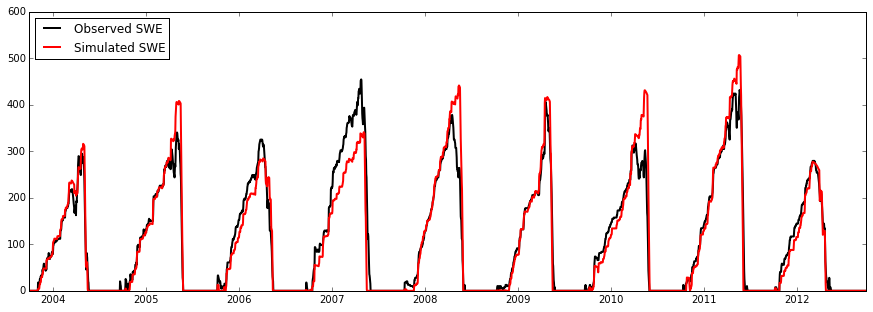

In [51]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(SWE.index,SWE.swe,'-k',lw=2)
ax.plot(dat.index,dat.snowpack,'-r',lw=2)
plt.legend(['Observed SWE','Simulated SWE'],loc='best')
plt.savefig('/RHESSys/ComoCreek_new/figures/best_snow.png',dpi=300,bbox_inches='tight')

In [52]:
cals.loc[cals.id==12835,'files'].as_matrix()[0]

'/RHESSys/ComoCreek_new/out/snow2/snow_cal2_12835_basin.daily'